# *Import Model section

In [7]:
# import packages
import pandas as pd
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from nilm_func import *

# *Define function

In [8]:
def figure_layout(case_id = 1, font = 'times new roman', weight = 'regular', size = 12):
    # case_id can only be 1,2,3
    if len([case_id]) > 1:
        print('Error: one case one time')
        return -1
    if (case_id == np.array([1,2,3])).sum() == 0:
        print('Error: Case can only be 1,2,or,3')
        return -1
    if case_id == 1:
        %matplotlib notebook
        %matplotlib inline
    elif case_id == 2:
        %matplotlib inline
        from IPython.display import set_matplotlib_formats
        set_matplotlib_formats('pdf')
    elif case_id == 3:
        %matplotlib notebook
    font = {'family' : font,
            'weight' : weight,
            'size'   : size}
    matplotlib.rc('font', **font)

# *Highly centralized parameter space

In [9]:
# highly centralized parameter space
load_data = 0
prepare_data = 0

In [10]:
# read Excel data
# instrument
if not load_data:
    yd = []
    for i in range(1,12):
        path = '/Users/dongqinghuang/Github/NILM/A题部分数据/附件1/YD'+str(i)+'.xlsx'
        yd.append(pd.ExcelFile(path))
    
    equip_data = []
    for i in range(1,12):
        equip_data.append(yd[(i-1)].parse('设备数据'))
    
    instrument = []
    for i in range(1,12):
        instrument.append('YD' + str((i)))

In [11]:
if not prepare_data:
    for i in range(0, len(equip_data)):
        equip_data[i] = fill_missing_data(equip_data[i])
        equip_data[i] = add_time_s(equip_data[i])

# *Quick look into data

<IPython.core.display.Javascript object>


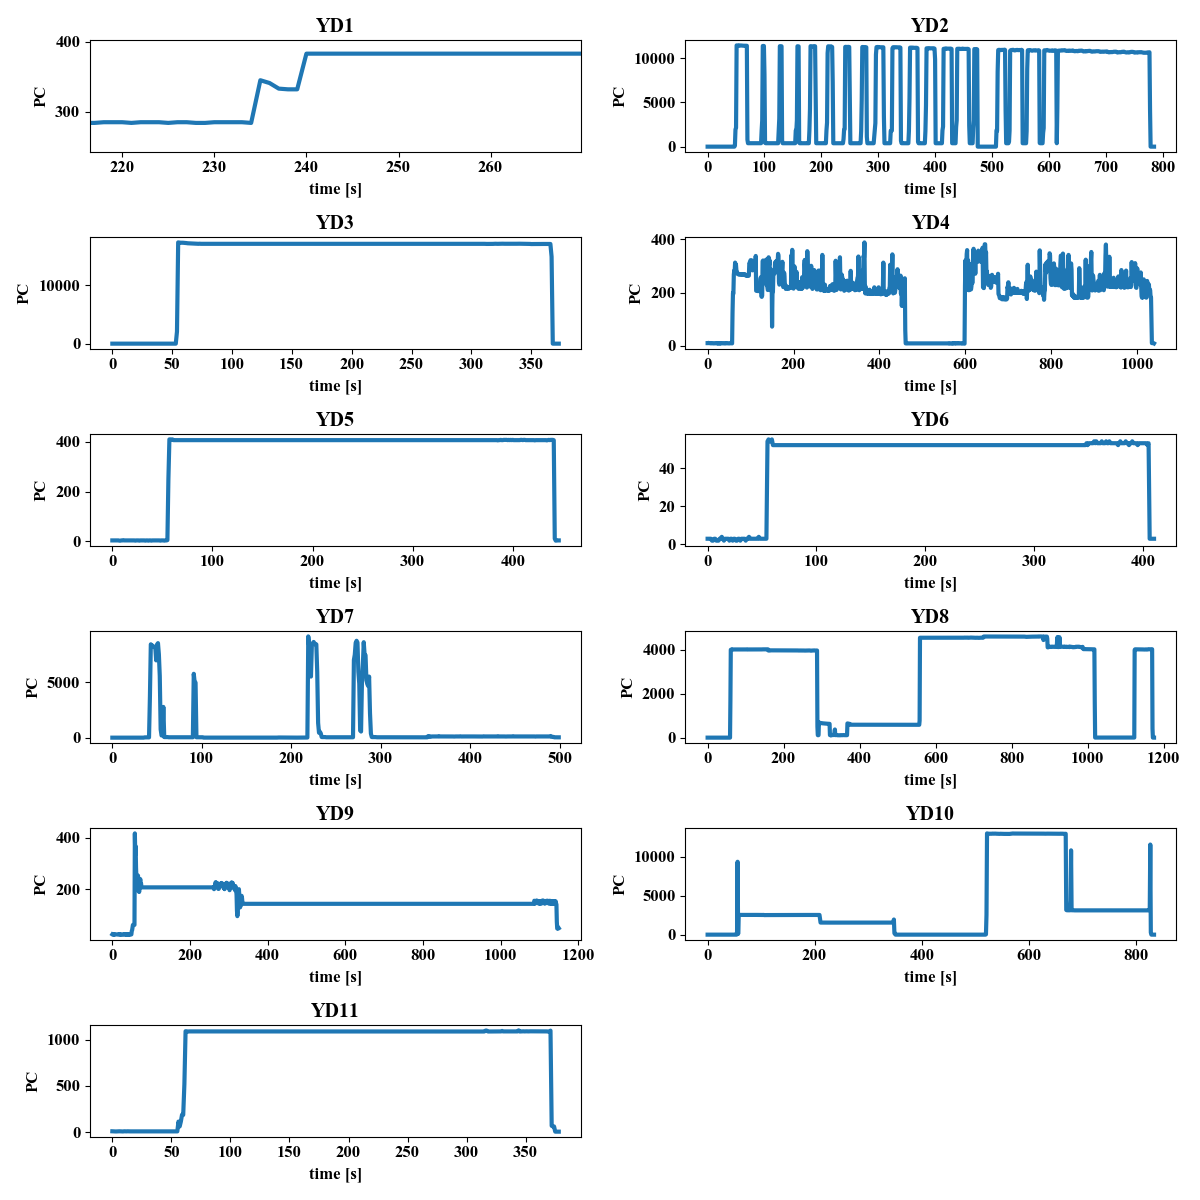

In [21]:
figure_layout(3)
fig = plt.figure(figsize=(12,12))
for i in range(0,len(equip_data)):
    #plt.subplot((431+i))
    ax = fig.add_subplot(6,2,(i+1))
    plt.plot(equip_data[i]['time_sec'], equip_data[i]['PC'].values, linewidth = 3)
    # plt.plot(equip_data_2['PC'].values, linewidth = 3)
    plt.xlabel('time [s]')
    plt.ylabel('PC')
    #plt.ylim(0.9,50000)
    #plt.yscale('log')
    plt.title(instrument[i])
plt.tight_layout()
plt.show()

In [ ]:
figure_layout(3)
fig = plt.figure(figsize=(10,10))
for i in range(0,len(equip_data)):
    #plt.subplot((431+i))
    ax = fig.add_subplot(6,2,(i+1))
    plt.plot(equip_data[i]['time_sec'], equip_data[i]['QC'].values, linewidth = 3)
    # plt.plot(equip_data_2['PC'].values, linewidth = 3)
    plt.xlabel('time [s]')
    plt.ylabel('QC')
    plt.title(instrument[i])
plt.tight_layout()
plt.show()

# *Calculate extra Features Sections

In [14]:
# compute diff - upto
for ii in range(0,len(equip_data)):
    for i in [1]: #[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
        lable1 = 'PC_'+str(i)+'pDiff'
        lable2 = 'QC_'+str(i)+'pDiff'
        equip_data[ii][lable1] = sweep_get_diff(equip_data[ii]['PC'].values,i)
        equip_data[ii][lable2] = sweep_get_diff(equip_data[ii]['QC'].values,i)
    # compute mean
    for i in [2,3,4]:
        lable1 = 'PC_'+str(i)+'pMean'
        lable2 = 'QC_'+str(i)+'pMean'
        equip_data[ii][lable1] = sweep_get_mean(equip_data[ii]['PC'].values,i)
        equip_data[ii][lable2] = sweep_get_mean(equip_data[ii]['QC'].values,i)
    # compute std
    for i in [3,4,5]:
        lable1 = 'PC_'+str(i)+'pStd'
        lable2 = 'QC_'+str(i)+'pStd'
        equip_data[ii][lable1] = sweep_get_std(equip_data[ii]['PC'].values,i)
        equip_data[ii][lable2] = sweep_get_std(equip_data[ii]['QC'].values,i)

In [15]:
# equip_data[1][['PC_2pDiff','PC_15pDiff']]

# *Check diff of all equipment

<IPython.core.display.Javascript object>


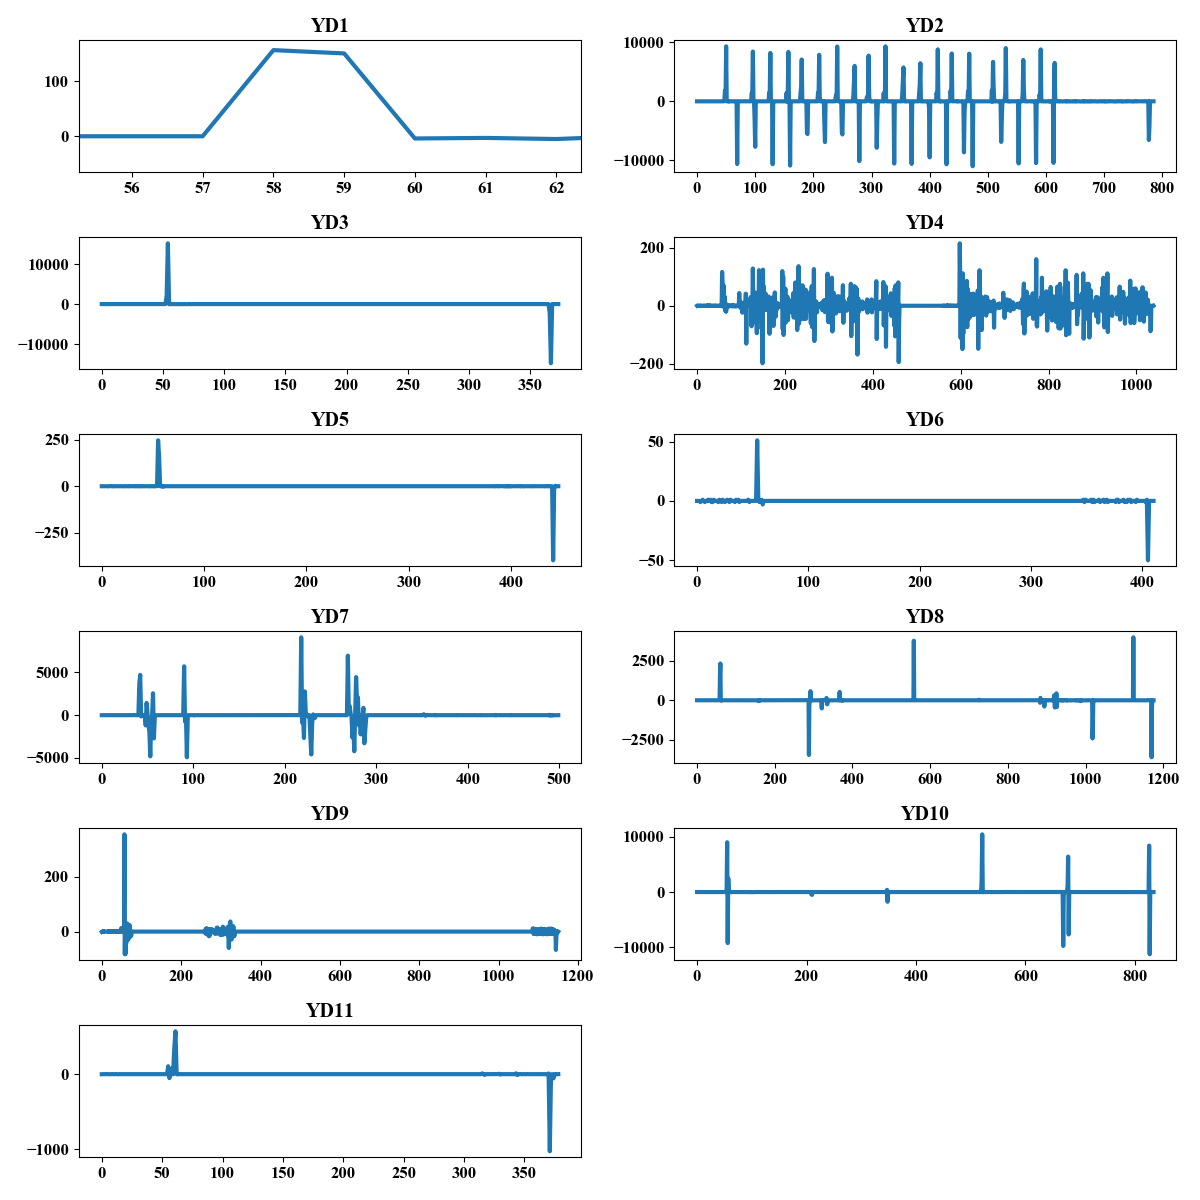

In [22]:
figure_layout(3)
fig = plt.figure(figsize=(12,12))
for i in range(0,len(equip_data)):
    ax = fig.add_subplot(6,2,(i+1))
    for ii in [1]: #[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
        label = 'PC_' + str(ii) + 'pDiff'
        plt.plot(equip_data[i]['time_sec'], equip_data[i][label].values, linewidth = 3)
    plt.title(instrument[i])
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


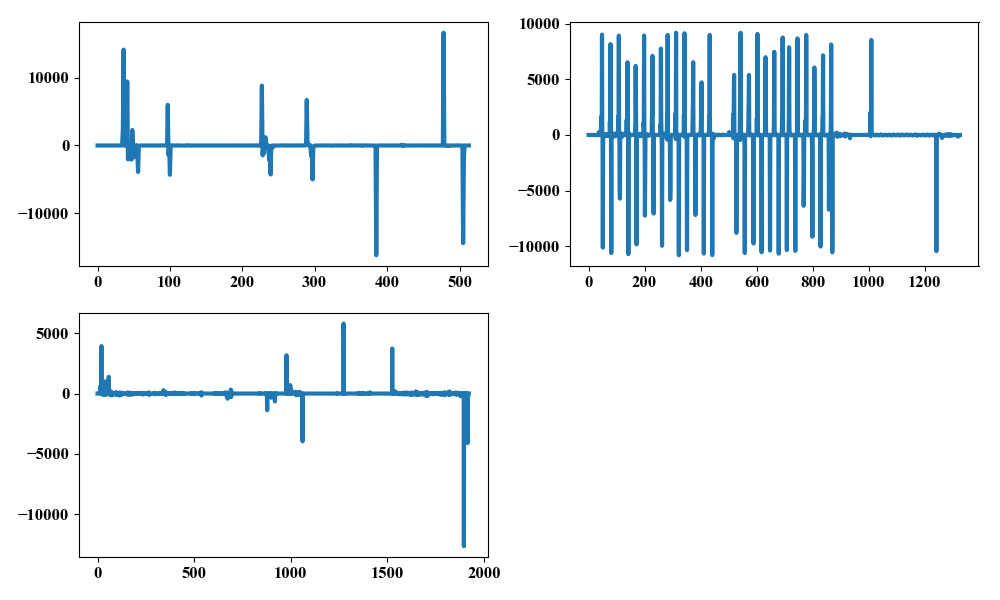

In [18]:
# temp - need to remove later
if 0:
    yd3yd7 = pd.ExcelFile("/Users/dongqinghuang/Github/NILM/A题部分数据/附件3/设备组1-YD3+YD7.xlsx")
    yd1yd2yd4 = pd.ExcelFile("/Users/dongqinghuang/Github/NILM/A题部分数据/附件3/设备组2-YD1+YD2+YD4.xlsx")
    yd4yd5yd10yd11=pd.ExcelFile("/Users/dongqinghuang/Github/NILM/A题部分数据/附件3/设备组3-YD4+YD5+YD8+YD10+YD11.xlsx")
    yd_mix = [yd3yd7,yd1yd2yd4,yd4yd5yd10yd11]
    equip_data_mix = []
    for i in range(1,4):
        equip_data_mix.append(yd_mix[(i-1)].parse('设备数据'))
    for i in range(0, len(equip_data_mix)):
        equip_data_mix[i] = fill_missing_data(equip_data_mix[i])
        equip_data_mix[i] = add_time_s(equip_data_mix[i])

    for ii in range(0,len(equip_data_mix)):
        for i in [1]: #[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
            lable1 = 'PC_'+str(i)+'pDiff'
            lable2 = 'QC_'+str(i)+'pDiff'
            equip_data_mix[ii][lable1] = sweep_get_diff(equip_data_mix[ii]['PC'].values,i)
            equip_data_mix[ii][lable2] = sweep_get_diff(equip_data_mix[ii]['QC'].values,i)
        # compute mean
        for i in [2,3,4]:
            lable1 = 'PC_'+str(i)+'pMean'
            lable2 = 'QC_'+str(i)+'pMean'
            equip_data_mix[ii][lable1] = sweep_get_mean(equip_data_mix[ii]['PC'].values,i)
            equip_data_mix[ii][lable2] = sweep_get_mean(equip_data_mix[ii]['QC'].values,i)
        # compute std
        for i in [3,4,5]:
            lable1 = 'PC_'+str(i)+'pStd'
            lable2 = 'QC_'+str(i)+'pStd'
            equip_data_mix[ii][lable1] = sweep_get_std(equip_data_mix[ii]['PC'].values,i)
            equip_data_mix[ii][lable2] = sweep_get_std(equip_data_mix[ii]['QC'].values,i)

figure_layout(3)
fig = plt.figure(figsize=(10,6))
for i in range(0,len(equip_data_mix)):
    ax = fig.add_subplot(2,2,(i+1))
    for ii in [1]: #[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
        label = 'PC_' + str(ii) + 'pDiff'
        plt.plot(equip_data_mix[i]['time_sec'], equip_data_mix[i][label].values, linewidth = 3)
        #plt.yscale('log')
    #plt.title(instrument[i])
plt.tight_layout()
plt.show()